In [1]:
import fastai.vision.all
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import time

In [2]:
import sys
sys.path.insert(0, '../')
from cnn_antbee_1 import AntBeeDataset, GetDataTransforms, TAlexNet

In [3]:
N_batch= 20
dataset_train= AntBeeDataset(transform=GetDataTransforms('train'), train=True)
dataset_test= AntBeeDataset(transform=GetDataTransforms('eval'), train=False)
# loader_train= torch.utils.data.DataLoader(
#               dataset=dataset_train,
#               batch_size=N_batch,
#               shuffle=True,
#               num_workers=2)
# loader_test= torch.utils.data.DataLoader(
#               dataset=dataset_test,
#               batch_size=N_batch,
#               shuffle=False,
#               num_workers=2)
#torch datasets to fastai DataLoaders.
dls= fastai.data.core.DataLoaders.from_dsets(dataset_train, dataset_test, bs=N_batch)

In [4]:
#Show the dataset info.
print('dataset_train size:',len(dataset_train))
print('dataset_train[0] input type, shape:',type(dataset_train[0][0]),dataset_train[0][0].shape)
print('dataset_train[0] label value:',dataset_train[0][1],dataset_train.classes[dataset_train[0][1]])
#print('dataset_train[0][0] value:',dataset_train[0][0][:,100:110,100:110])
print('dataset_train[0][0] value range:',torch.min(dataset_train[0][0]),torch.max(dataset_train[0][0]))
print('dataset_test size:',len(dataset_test))
print('dataset_test[0] input type, shape:',type(dataset_test[0][0]),dataset_test[0][0].shape)
print('dataset_test[0] label value:',dataset_test[0][1],dataset_test.classes[dataset_test[0][1]])
print('dataset_test[0][0] value range:',torch.min(dataset_test[0][0]),torch.max(dataset_test[0][0]))

dataset_train size: 245
dataset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 224, 224])
dataset_train[0] label value: 0 ants
dataset_train[0][0] value range: tensor(-0.9765) tensor(1.)
dataset_test size: 153
dataset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 224, 224])
dataset_test[0] label value: 0 ants
dataset_test[0][0] value range: tensor(-1.) tensor(1.)


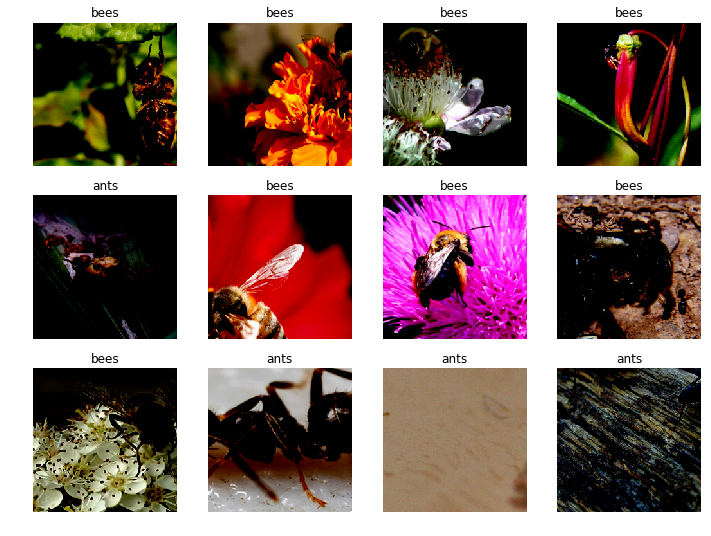

In [6]:
# x: Datasets
def show_grid(x, imgs, labels, ctxs=None, max_n=12, nrows=None, ncols=4, figsize=None, **kwargs):
    # if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = fastai.vision.all.get_grid(min(len(imgs), max_n), nrows=None, ncols=ncols, figsize=figsize)
    for ctx,img,label in zip(ctxs,imgs,labels):
        # x.show((img,label), ctx=ctx)
        i= img.clamp(0,1) if isinstance(img,torch.Tensor) else img
        t= x.classes[label] if not isinstance(label,str) else str(label)
        fastai.vision.all.show_image(i, title=t, ctx=ctx, **kwargs)
b= dls.one_batch()
show_grid(dls, b[0], b[1])

In [8]:
# dls.show  #'AntBeeDataset' object has no attribute 'show'

In [9]:
net= TAlexNet(n_classes=len(dataset_train.classes), img_shape=dataset_train[0][0].shape)

/home/akihikoy/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [10]:
# opt= torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [11]:
learn= fastai.vision.all.Learner(dls, net, 
                                 loss_func=fastai.vision.all.CrossEntropyLossFlat(), metrics=fastai.vision.all.accuracy)
# opt_func=fastai.vision.all.SGD)

In [12]:
learn.summary()

TAlexNet (Input shape: 20)
Layer (type)         Output Shape         Param #    Trainable 
                     20 x 64 x 55 x 55   
Conv2d                                    23296      True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     20 x 192 x 27 x 27  
Conv2d                                    307392     True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     20 x 384 x 13 x 13  
Conv2d                                    663936     True      
ReLU                                                           
____________________________________________________________________________
                     20 x 256 x 13 x 13 

SuggestedLRs(valley=0.00010964782268274575)

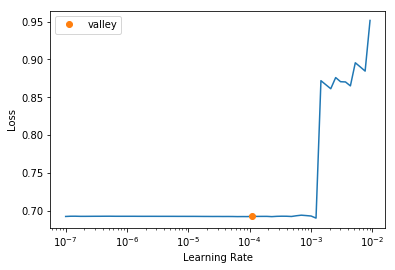

In [9]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(10, 0.0001)

epoch,train_loss,valid_loss,accuracy,time
0,0.693193,0.692648,0.594771,00:04
1,0.693371,0.690758,0.607843,00:04
2,0.692757,0.696553,0.457516,00:04
3,0.683752,0.707032,0.535948,00:04
4,0.668868,0.654637,0.581699,00:04
5,0.654164,0.656261,0.601307,00:04
6,0.644986,0.672622,0.640523,00:04
7,0.630928,0.638653,0.607843,00:04
8,0.619029,0.633529,0.620915,00:04
9,0.608866,0.633190,0.620915,00:04


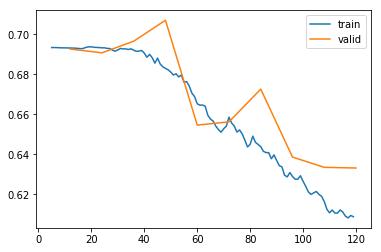

In [14]:
learn.recorder.plot_loss()

SuggestedLRs(valley=5.248074739938602e-05)

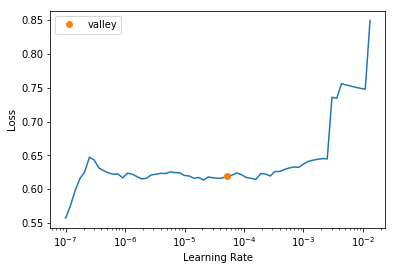

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(5, 5.2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.614341,0.695134,0.614379,00:04
1,0.613580,0.664590,0.633987,00:04
2,0.613116,0.647929,0.562092,00:04
3,0.604770,0.639537,0.627451,00:04
4,0.596302,0.641366,0.633987,00:04


SuggestedLRs(valley=4.365158383734524e-05)

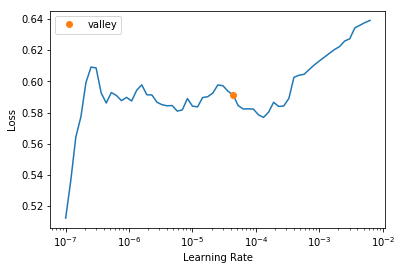

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(5, 4.4e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.572818,0.650785,0.640523,00:04
1,0.577472,0.622171,0.660131,00:04
2,0.579910,0.617076,0.653595,00:04
3,0.576537,0.616764,0.666667,00:04
4,0.571730,0.615950,0.660131,00:04


SuggestedLRs(valley=2.0892961401841603e-05)

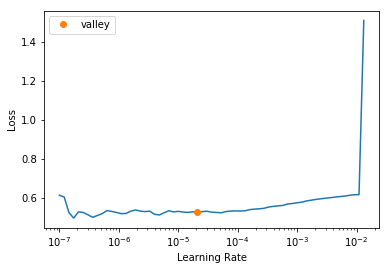

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(5, 2.1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.548181,0.612793,0.666667,00:04
1,0.542994,0.583937,0.686275,00:04
2,0.541167,0.600704,0.653595,00:04
3,0.532622,0.604313,0.660131,00:04
4,0.531379,0.604940,0.666667,00:04


In [20]:
learn.fit_one_cycle(10, 2.1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.516812,0.593424,0.666667,00:04
1,0.525441,0.589017,0.679739,00:04
2,0.528754,0.624030,0.692810,00:04
3,0.530435,0.589839,0.673203,00:04
4,0.526848,0.591956,0.679739,00:04
5,0.526993,0.583109,0.705882,00:04
6,0.524896,0.588542,0.692810,00:04
7,0.522884,0.576801,0.705882,00:04
8,0.519249,0.574942,0.705882,00:04
9,0.509484,0.574201,0.705882,00:04


In [21]:
learn.fit_one_cycle(10, 2.1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.484026,0.572050,0.692810,00:04
1,0.498560,0.586143,0.699346,00:04
2,0.503322,0.561676,0.705882,00:04
3,0.496804,0.632015,0.673203,00:04
4,0.500200,0.584149,0.673203,00:04
5,0.506714,0.593293,0.673203,00:04
6,0.511274,0.580614,0.686275,00:04
7,0.506503,0.564151,0.712418,00:04
8,0.496446,0.566663,0.705882,00:04
9,0.499015,0.567171,0.705882,00:04


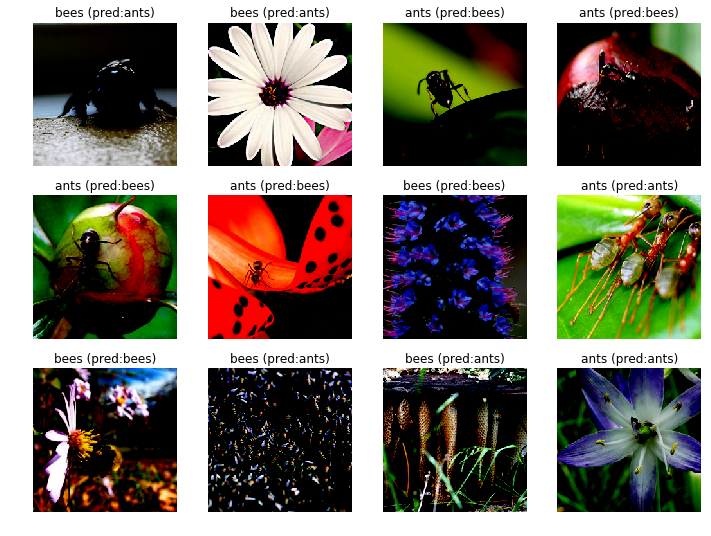

In [19]:
b= [dls.valid_ds[idx] for idx in np.random.permutation(len(dls.valid_ds))[:12]]
show_grid(dls, [img for img,label in b], [f'{dls.classes[label]} (pred:{dls.classes[learn.predict([img])[0]]})' for img,label in b])